# Day 24

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

# 선형회귀분석의 기초

회귀분석(regression analysis)은 독립변수 $x$와 이에 대응하는 실수 종속변수 $y$간의 관계를 정량화하는 작업이다. 

회귀분석에는 결정론적 모형(Deterministic Model)과 확률적 모형(Probabilistic Model)이 있다. 
결정론적 모형은 단순히 독립 변수 $x$에 대해 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ \hat{y} = f \left( x \right) $$

이 함수는 모형계수 추정을 위한 과거 자료 $ \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} $에 의존하므로 다음과 같이 표기하기도 한다.

$$ \hat{y} = f \left( x; \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} \right) $$


만약 함수 $f(x)$가 다음과 같은 선형 함수이면 선형회귀분석(linear regression analysis)이라고 한다.

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D $$

위 식에서 $w_0, \cdots, w_D$는 위 함수의 계수(coefficient)이자 이 선형회귀모형의 모수(parameter)이다. 

## 오그멘테이션 (Augmentation)

상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다. 이를 오그멘테이션(augmentation)이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

이렇게 되면 전체 수식이 다음과 같이 가중치 벡터와 입력 데이터 벡터의 내적으로 간단히 표시된다.

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w = w^T x_a
$$

상수항이 0이 아닌 경우에는 항상 오그멘테이션을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 오그멘테이션이 되어 있는 경우가 많다.  

다음은 오그멘테이션을 하는 코드 예제이다.

In [19]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [20]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [21]:
# 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [22]:
import statsmodels as sm

X = sm.tools.tools.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## OLS (Ordinary Least Squares)

OLS는 가장 기본적인 결정론적 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.


* 잔차 벡터
$$ e = {y} - Xw $$

* 잔차제곱합
$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

* 행렬 미분으로 구한 그레디언트
$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

* 최적화 조건
$$ \dfrac{d \text{RSS}}{d w}  = 0 $$

$$ X^TX w = X^T y $$

$$  w = (X^TX)^{-1} X^T y $$


여기에서 그레디언트를 나타내는 다음 식을 **정규 방정식(Normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

정규방정식에서 **잔차 벡터가 모든 데이터 벡터들과 각각 직교**함을 알 수 있다.

$$ X^T (y - X w ) = X^T e = 0 $$

$$ x_i^T e = 0 $$

$$ x_i \perp e $$

여기에서 $x_i^T$는 $X$행렬의 $i$번째 행 벡터, 즉 각각의 데이터 벡터이다.

다음은 OLS 방법으로 선형회귀분석을 하는 예제이다.

**이거 외워** 특히 error vector와 각 데이터 벡터가 직교한다는 사실이 중요. (여기서 데이터 벡터란 하나의 데이터 sample이 아닌 모든 데이터 sample의 특정 feature column에 해당

In [23]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1)
X = sm.tools.tools.add_constant(X0)
y = y.reshape(len(y), 1)

In [24]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("w:\n", w)

w:
 [[ 102.02701439]
 [  81.59750943]]


In [25]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

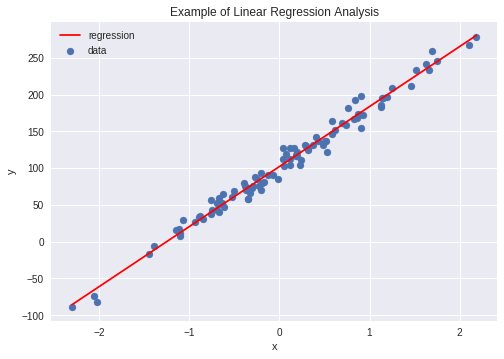

In [28]:
xx = np.linspace(np.min(X0), np.max(X0), 100)
XX = sm.tools.tools.add_constant(xx)  # 오그멘테이션
yy = np.dot(XX, w)

plt.scatter(X0, y, label="data")
plt.plot(xx, yy, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

##  Scikit-Learn 패키지를 사용한  선형회귀분석

Scikit-Learn 패키지를 사용하여 선형회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.

1. `LinearRegression` 클래스 객체 생성
    ```
    model = LinearRegression(fit_intercept=True)
    ```
    상수항이 없으면 `fit_intercept=False`로 설정한다.

2. `fit` 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.
    ```
    model.fit(X, y)
    ```
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다.
    * `coef_` : 추정된 가중치 벡터
    * `intercept_` : 추정된 상수항 

3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    ```
    y_new = model.predict(x_new)
    ```

다음은 보스턴 집값 데이터를 사용하여 회귀분석을 하는 예이다.

In [39]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression()
model_boston.fit(boston.data, boston.target)

print(model_boston.coef_)
print(model_boston.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


---
fit의 경우 return을 할 필요는 없다. 자기 자신을 return한다면 chain call이 가능하다. 즉 다음과 같은 call이 가능해진다.

* x.method1().method2().method3()

---

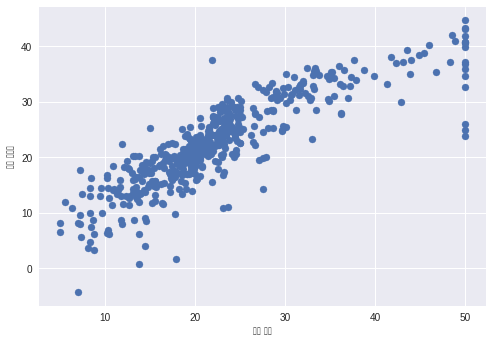

In [40]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

**하지만 scikit learn의 linear regression은 후지다. 따라서 statsmodels의 regression을 사용하도록 하자.**

## StatsModels 를 사용한 선형회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.


1. `OLS` 클래스 객체 생성. 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.
    ```
    model = OLS(y, X)
    ```
    
2. `fit` 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    ```
    result = model.fit()
    ```

3. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary()
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

In [111]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.tools.tools.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

from statsmodels.regression.linear_model import OLS
model_boston2 = OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 26 Jun 2017   Prob (F-statistic):          6.95e-135
Time:                        14:13:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [110]:
dir(result_boston2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


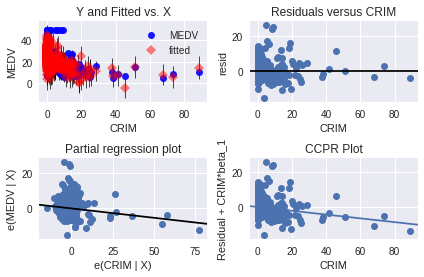

In [116]:
from statsmodels.graphics.regressionplots import plot_regress_exog
plt.figure(figsize=(18,12))
fig = plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

# 레버리지와 아웃라이어

## 레버리지 (Leverage)

개별적인 데이터 표본이 회귀 분석 결과에 미치는 영향은 레버리지(leverage)분석을 통해 알 수 있다.

레버리지는 원래의 target value $y$가 예측된(predicted) target $\hat{y}$에 미치는 영향을 나타낸 값이다. self-influence, self-sensitivity 라고도 한다

레버리지는 `RegressionResults` 클래스의 `get_influence` 메서드로 구할 수 있다.

* weight vector

$$  w = (X^TX)^{-1} X^T y $$

$$  \hat{y} = X w = X((X^TX)^{-1} X^T y ) = ( X(X^TX)^{-1} X^T) y = Hy $$

* leverage $h_{ii}$
$$  h_{ii}=(H)_{ii} $$


* leverage 특성
$$  0 \leq h_{ii} \leq 1 $$


$$  \sum_i^N h_{ii} = \text{모수의 수} (=trace) $$

* leverages는 어떤 데이터 포인트가 예측점을 자기 자신의 위치로 끌어 당기는 정도
 * 만약 어떤 $i$번째 데이터에 대해 $h_{ii} \simeq 1$이면 
 $$ \hat{y} \simeq y $$

---
** 즉 $\hat{y} = Hy$에서 H의 대각성분 값을 leverage값이라 한다.** 즉 $y=ax+b$꼴의 직선일 경우에는 parameter가 두 개이므로 $h_{ii}$의 합은 2가 되어야한다. 여기서 문제가 생기게 되는데 우리가 바라는 것은 $H$의 $h_{ii}$가 1이되는 것이나 샘플이 100개라면 100개의 값이 2를 쪼개 갖게 되므로 실제로는 매우 작은수의 leverage를 갖게된다.

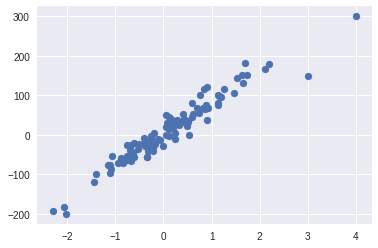

In [119]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# add high-leverage points
X0 = np.vstack([X0, np.array([[4],[3]])])
X = sm.tools.tools.add_constant(X0)
y = np.hstack([y, [300, 150]])
plt.scatter(X0, y)
plt.show()

In [120]:
model = OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           1.61e-61
Time:                        14:39:03   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

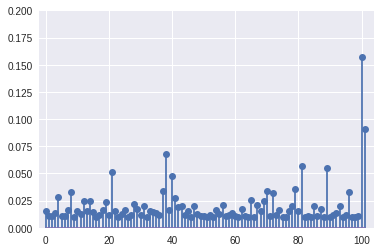

hat.sum() = 2.0


In [121]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(y)+2, 0, 0.2 ])
plt.show()
fromprint("hat.sum() =", hat.sum())

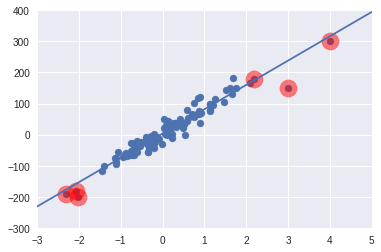

In [126]:
from statsmodels.graphics.regressionplots import abline_plot

plt.scatter(X0, y)
abline_plot(model_results=result, ax=plt.gca())

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])
plt.show()

데이터 무리에서 떨어진 애들이 leverage가 크다는 것을 볼 수 있다. leverage가 크다는 것은 내가 곧 법칙이다라고 이야기하는 것을 말한다. 

해석)
집값을 예로 들자면 20~40평대의 경우샘플이 많으나 무리에서 이탈한 대형평수를 보게되면 그 평수대에서는 샘플이 적더라도 그 샘플의 값을 믿어야 한다.

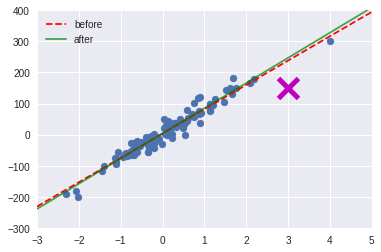

In [129]:
model2 = OLS(y[:-1], X[:-1])
result2 = model2.fit()
plt.scatter(X0, y);
abline_plot(model_results=result, c="r", linestyle="--", ax=plt.gca())
abline_plot(model_results=result2, c="g", alpha=0.7, ax=plt.gca())
plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.axis([-3, 5, -300, 400])
plt.legend(["before", "after"], loc="upper left")
plt.show()

3,150하나 뺐는데 직산이 크게 달라짐을 볼 수 있다. 즉 3,150이 자기쪽으로 직선을 당겼다는 것을 알 수 있다.

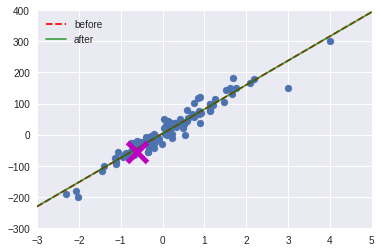

In [131]:
model3 = OLS(y[1:], X[1:])
result3 = model3.fit()
plt.scatter(X0, y)
abline_plot(model_results=result, c="r", linestyle="--", ax=plt.gca())
abline_plot(model_results=result3, c="g", alpha=0.7, ax=plt.gca())
plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.axis([-3, 5, -300, 400])
plt.legend(["before", "after"], loc="upper left")
plt.show()

레버리지가 낮은 애는 없어져도 큰 영향을 주지 않는다.

## 아웃라이어(Outlier)

일반적인 데이터 분포에서 아웃라이어는 다른 데이터와 동떨어진 데이터를 나타내지만 회귀 분석에는 레버리지와 오착가 모두 큰 데이터를 말한다.

* Good 레버리지 데이터
     * 레버리지가 높지만 오차가 작은 데이터


* Bad 레버리지 데이터 = **아웃라이어(Outliner)**
     * 레버리지가 높고 오차도 큰 데이터

모델을 수정하는 것은 선형성자체를 비선형으로 바꾸던가 혹은 다른 feature의 영향을 잡지 못하였다고 접근할 수 있다. 

레버리지가 작다면 문제가되지 않는다 그 아이 하나만 틀리므로 버리면 된다. 그러나 레버리지가 크다면 모델에 영향을 많이 주게 된다. 따라서 레버리지가 크다면 고민을 많이 해야한다.

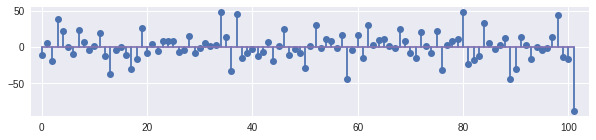

In [132]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.xlim([-2, len(y)+2])
plt.show()

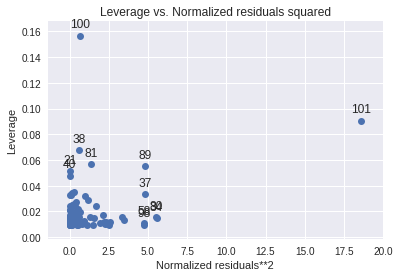

In [134]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(result)
plt.show()

## Influence

* Cook's Distance
 * (normalized) residual과 leverage의 복합 측도
  
 $$ D_i = \frac{e_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $$

RSS커지면 작아지고 h(leverage)가 커지면 커진다

* Fox' Outlier Recommendation
  $$ D_i > \dfrac{4}{N − 2(\text{number of parameters})} $$

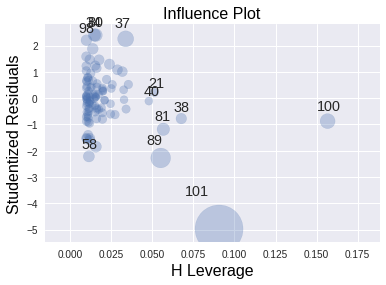

In [143]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(result, plot_alpha=0.3)
plt.show()

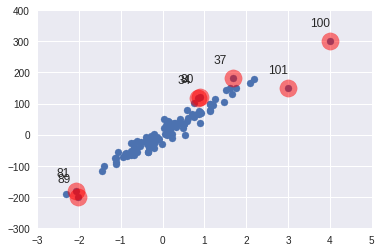

In [173]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])

from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, list(zip(X0[idx], y[idx])), [(-20,15)]*len(idx), size="large", ax=plt.gca())
plt.show()

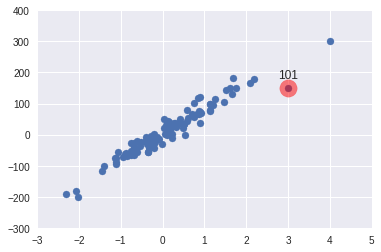

In [176]:
idx = np.nonzero(result.outlier_test().iloc[:, -1].abs() < 0.9)[0]
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400]);
utils.annotate_axes(range(len(idx)), idx, list(zip(X0[idx], y[idx])), [(-10,10)]*len(idx), size="large", ax=plt.gca())
plt.show()

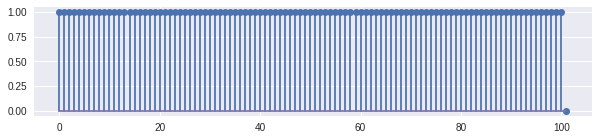

In [178]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().iloc[:, -1])
plt.show()

# 확률론적 선형 회귀 모형

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정없이도 최적의 가중치를 계산할 수 있다. 그러나 이 경우에는 계산한 가중치가 어느 정도의 신뢰도 또는 안정성을 가지는지 확인할 수 있는 방법이 없다. 이를 확인하고자 하는 시도 중의 하나가 부트스트래핑(bootstrapping) 방법이다.

**여러분야에서 사용되며 보통 외부의 도움없이 자체적으로 해결하려는 노력을 통상 bootstrapping이라고 한다.**(잡을게 없으면 자기 구두끈이라도 잡아야 한다.)

## 부트스트래핑

부트스트래핑(bootstrapping)은 회귀 분석에 사용한 데이터가 달라진다면 회귀 분석의 결과는 어느 정도 영향을 받는지를 알기 위한 방법이다. 

데이터가 확률 변수로부터 생성된 표본이거나 혹은 더 큰 모집단 중에서 선택한 표본이라고 가정한다면 회귀 분석의 결과는 분석에 사용한 표본에 의존적임을 알 수 있다. 만약 추가적인 다른 표본을 얻어서 다시 회귀 분석에 사용한다면 회귀 분석 결과 즉, 가중치 벡터의 값은 달라질 것이다.

그러나 현실적으로는 데이터를 추가적으로 얻기가 힘들기 때문에 부트스트래핑 방법에서는 기존의 데이터를 재표본화(re-sampling)하는 방법을 선택한다. 재표본화는 기존의 $D$개의 데이터에서 다시 $D$개의 데이터를 선택하되 중복 선택도 가능하게 한다. (resampling with replacement) 이 경우 이론적으로는 $O(2^D)$ 수준의 새로운 표본 집단을 얻을 수 있다.

직접 부트스트래핑을 실시해 보자. 우선 100개의 가상 데이터를 생성하여 이를 기반으로 회귀 분석을 실시한다.

In [181]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)

dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.tools.tools.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = OLS(dfy, dfX)
result = model.fit()
print(result.params)

const    -1.628364
X1       42.853356
dtype: float64


In [183]:
N = 1000
params_c = np.zeros(N)
params_x1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = OLS(dfy2, dfX2).fit()
    params_c[i] = r.params.const
    params_x1[i] = r.params.X1

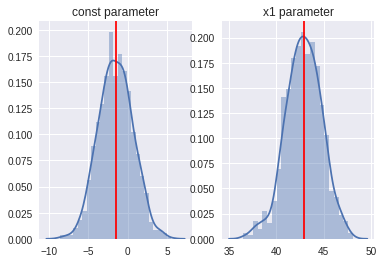

In [184]:
ax1 = plt.subplot(121)
sns.distplot(params_c, ax=ax1)
plt.axvline(params_c.mean(), c='r')
plt.title("const parameter")
ax2 = plt.subplot(122)
sns.distplot(params_x1, ax=ax2)
plt.axvline(params_x1.mean(), c='r')
plt.title("x1 parameter")
plt.show()

In [186]:
from scipy.stats import describe
describe(params_c)

DescribeResult(nobs=1000, minmax=(-8.6200653134399108, 5.4974461054039603), mean=-1.527552269197618, variance=4.7221108924801865, skewness=0.037291167444340675, kurtosis=-0.07798052400480948)

In [187]:
describe(params_x1)

DescribeResult(nobs=1000, minmax=(36.484632497922348, 48.107332558744098), mean=42.871855787600275, variance=3.616677185407013, skewness=-0.2047868766527619, kurtosis=0.16409791128997853)

가중치 중 상수항의 경우 평균은 -1.6이지만 표분 편차가 $\sqrt{4.81}=2.19$이므로 0일 가능성을 배제할 수 없다.

이 결과를 statsmodels 의 회귀 분석 보고서와 비교하자.

**x1은 최소한 0은 되지 않으나 const는 0이 될 수 도 있다. 즉 const value는 믿을 수 없다. 특히 0이 될 수 있다는 것은 영향을 미치지 않는 요소일 수 있다는 점에서 매우 중요하다. 따라서 영향을 주지 않는 쓰레기 feature로 볼 수 있다. 이럴 경우 *빼야* 한다.**

In [188]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           2.21e-36
Time:                        15:58:19   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

# 중요! (single coefficient test)
report 읽기. 각각의 coefficient확인, single coefficient t test라고 하기도 함.

**리포트읽기: t,와 P>|t|에 주목하자. coef가 0이라는 전제를 했을 때 const의 경우 t는 -0.753이며 p-value는 45.3%이다. 즉 coef가 0일때 -1.6284는 충분히 나올 수 있다는 뜻으로 해석할 수 있고 따라서 이 const는 믿을 수 없는 값이다. (무관한 값). 반면 X1을 살펴보자. X1=7.104라는 값을 볼 때 X1이 0이라는 가설이 되며 t값은 20, p-value는 0이된다. 따라서 X1이 0일 가능성은 거의 없다는 뜻이며 믿을 수 있다는 뜻이 된다.**

p-value의 오른쪽은 confidence interval이다. 신뢰구간은 약 $\pm2.3 \sim 2.5 \sigma$정도이다. 즉 이 confidence inteval내에 0이 있다면 믿을 수 없다는 뜻으로 보아도 된다.

보고서의 std err 항목을 보면 표준 편차의 경우 2.163 이고 마지막의 신뢰 구간(confidence interval)이 -5.920 ~ 2.663 임을 보이고 있다. 부트스트래핑으로 얻은 결과와 유사하다. 이 결과는 다음에 설명할 확률론적 가정에 의해 계산된 값이다.

## 확률론적 선형 회귀 모형

확률론적 선형 회귀 모형에서는 $y$가 확률 변수로부터 생성된 표본이라고 가정하며 다음과 같은 조건을 만족한다.


1. 선형 정규 분포 가정
 * 종속 변수 $y$는 기댓값 $w^Tx$, 분산 $\sigma^2$ 를 가지는 정규 분포 확률 변수이다.
   $$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$ 
 * 따라서 오차(disturbance)  $ \epsilon = y-w^Tx $ 도 정규 분포 확률 변수이다.
   $$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ 

2. 외생성(Exogeneity) 가정
 * 오차 $\epsilon$와 독립 변수 $x$는 서로 독립이다. 즉, $ \text{E}[\epsilon] = 0$ 은 $x$의 값에 상관없이 유지된다.
   $$ \text{E}[\epsilon \mid x] = 0$$ 
 *   오차 $\epsilon$의 분산은 독립 변수   $x$와 상관관계가 없다.
   $$ \text{Var}[\epsilon \mid x] = \text{const.}$$ 
   샘플의 수가 복수이면 샘플 오차 벡터 $\epsilon$에 대해 다음과 같이 쓸 수 있다. 아래 식에서의 $\epsilon$은 샘플 수와 같은 길이의 벡터이다.
   $$  \text{Cov}[\epsilon_i, \epsilon_j \mid x] = \text{E}[ \epsilon \epsilon^T \mid x ] = \sigma^2 I $$

3. 조건부 독립 가정
 * $i$번째 샘플의 오차 $\epsilon_i$와 $j$번째 샘플의 오차 $\epsilon_j$는 $x$에 대해 서로 조건부 독립이다. **이 조건을 만족하지 않는다면, 즉 이전의 결과가 영향을 준다면 시계열분석을 해야한다.**
   $$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] =  0$$ 


   

## MLE를 사용한 선형 회귀 분석

앞의 확률론적 선형 회귀 모형과 MLE(Maximum Likelihood Estimation)을 사용하여 가중치 벡터 $w$의 값을 구해보자.

Likelihood는 다음과 같다.


$$
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N N(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
$$

계산을 용이하기 위해 Log를 취하면 다음과 같다.
$$
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
$$



이를 행렬로 표시하면 다음과 같다.


$$
\text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0
$$

$$
C_1 =  -\dfrac{1}{2\sigma^2}
$$

$$
C_0 =  \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2} 
$$

이를 최적화하면 OLS와 동일한 결과를 얻을 수 있다.


$$
\dfrac{\partial}{\partial w} \text{LL} \propto - 2X^TX \hat{w} + 2X^Ty = 0
$$

$$
\hat{w} = (X^TX)^{-1}X^T y
$$


**즉 OLS로 구한 값이나, MLE로 구한 조건이나 결과는 동일하다.**

## 잔차의 분포 (중요)

위의 확률론적 선형 회귀 모형에 따르면 잔차 $e = y - \hat{w}^Tx$ 도 정규 분포를 따른다. 이는 다음과 같이 증명할 수 있다.

확률론적 선형 회귀 모형의 오차 $\epsilon$와 잔차 $e$는 다음과 같은 관계를 가진다.

$$  \hat{y} = X\hat{w} = X (X^TX)^{-1}X^T y = Hy $$

$$ e = y - \hat{y}= y - Hy = (I - H) y$$

$M = I - H$이라고 정의하면

$$ e = My = M (Xw + \epsilon) $$

최적화 조건에서

$$
X^TX \hat{w} - X^Ty = 0
$$

$$
X^T(X\hat{w} - y) = -X^Te = 0
$$

$$
X^TMy = 0 
$$

이 식은 모든 $y$에 대해 성립하므로

$$
X^TM = 0
$$

$H$가 대칭 행렬이므로 $M = I -H$도 대칭 행렬

$$
MX = 0
$$


$$ e = MXw + M\epsilon = M\epsilon $$

즉, 잔차 $e$는 오차 $\epsilon$의 선형 변환(linear transform)이다. **정규 분포의 선형 변환은 마찬가지로 정규 분포이므로 잔차도 정규 분포를 다른다.**

In [314]:
result.resid

0     -7.635506
1    -38.939690
2     -9.552990
3     38.255888
4      5.900932
5     19.784758
6    -27.716644
7      0.338671
8     26.777366
9    -16.520983
10    -9.766116
11     9.415149
12   -20.404487
13   -20.793592
14     7.298008
15    22.036515
16     6.711692
17    -2.877215
18    38.219487
19    12.371267
20    21.786779
21    -5.031094
22    39.500394
23     3.276509
24    27.099870
25    46.951281
26     8.993691
27    -1.703756
28    36.596204
29     8.119797
        ...    
70    -0.348505
71    10.679246
72   -34.628332
73   -18.351910
74     5.852962
75   -13.155880
76    23.354200
77   -20.220436
78   -34.308694
79    18.766842
80     5.669134
81    -4.624215
82    -2.483396
83     3.067405
84    13.768100
85   -24.051373
86     3.463774
87     9.775507
88    27.585363
89    25.813244
90    14.850106
91    13.949969
92   -16.638052
93    -5.726520
94   -17.103654
95     4.060166
96    31.612511
97    -5.178971
98    33.665479
99    -8.575956
Length: 100, dtype: floa

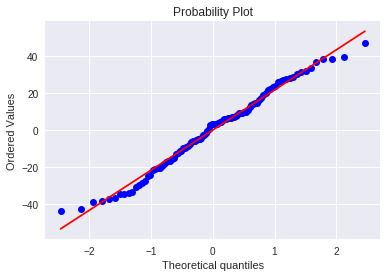

In [191]:
from scipy.stats import probplot
probplot(result.resid, plot=plt)
plt.show()

이 결과가 normal분포가 아니라면, 처음의 가정이 틀린 것으로 해석할 수 있다.

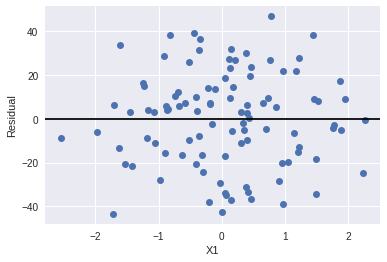

In [195]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

In [375]:
def make_regression3(n_samples=100, noise_sigma=1):
    """Returns randomized X, w, y0 set in tuple form.
    
    Noise is normally distributed. Sigma can be set by parameter noise_sigma (default=1)
    """
    # w
    w = np.array([0,1])
    # X
    X = (3 - (-1)) * np.random.random_sample((n_samples,1)) + (-1)
    X_squared = np.array(X**2)
    XX = np.concatenate((X,X_squared), axis=1)
    # y0
    y0 = np.dot(XX, w)
    y0 = y0[:,np.newaxis]
    # y
    noise = np.random.normal(0, noise_sigma, n_samples).reshape(n_samples, 1)
    y = y0.reshape(n_samples,1) + noise
    error = y-y0
    return X, y, error

In [376]:
X, y, error = make_regression3(n_samples=300)

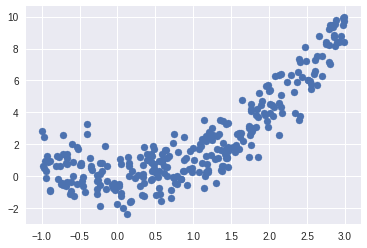

In [377]:
plt.scatter(X,y)

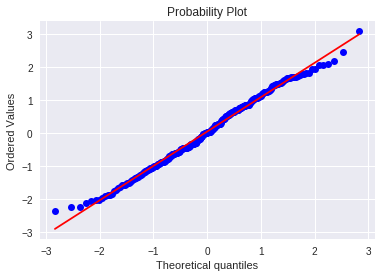

In [378]:
from scipy.stats import probplot
probplot(error.flatten(), plot=plt)
plt.show()

x를 각각의 segment로 나누어 정규분포를 따르는지 확인해 본다.

In [379]:
import statsmodels.stats.api as sms
test = sms.omni_normtest(result.resid)
for x in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % x)

Chi^2       :  3.523
P-value     :  0.172


In [380]:
import statsmodels.stats.api as sms
test = sms.jarque_bera(result.resid)
for x in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % x)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


## 회귀 계수의 표준 오차

가중치 $\hat{w}$ 도 정규 분포 확률 변수인 $y$의 선형 변환이므로 정규 분포를 따른다.

$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

따라서 가중치의 기댓값은 다음과 같다.

$$  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
$$


가중치의 (공)분산을 계산하면 다음과 같다.


$$
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
$$


$\sigma^2$의 값은 알지 못하므로 다음과 같이 추정한다.

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$
여기에서 $N$은 표본 데이터의 수, $K$는 독립 변수의 수이다.

따라서 $\hat{w}$의 (공)분산의 추정값은 
$$ \text{Est.Cov}[\hat{w}]  = s^2(X^TX)^{-1}$$
이다.

이 공분산 행렬에서 우리가 관심을 가지는 값은 $w_i$의 분산을 뜻하는 대각 성분 $$\text{Est.Var}[\hat{w}_i]  = \left( \text{Est.Cov}[\hat{w}] \right)_{ii} $$ 이다.
이 값에서 구한 표준 편차를 회귀 계수의 표준 오차(Standard Error of Regression Coefficient)라고 한다.

 $$ {se_i} = \sqrt{s^2 \big((X^TX)^{-1}\big)_{ii}} $$

## 단일 계수 t-검정 (Single Coefficient t-test)

$\hat{w}$을 위에서 구한 표준 오차로 나눈 값은 자유도가 $N-K$인 student-t 분포를 따른다.

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} $$

이를 검정 통계량(test statistics)로 사용하면 특정 회귀 계수 $w_i$가 0 인지 아닌지에 대해 조사할 수 있다.

$$ H_0 : \;\; w_i = 0 $$
 

## Loss-of-Fit 검정 (회귀 분석 F-검정)

개별 개수가 아닌 전체 회귀 계수가 모두 의미가 있는지 확인하려면 에 대해 다음과 같은 귀무 가설을 생각할 수 있다.

$$ H_0 : w_1  = w_2 = \cdots = w_K = 0 $$

이는 전체 독립 변수 중 어느 것도 의미를 가진 것이 없다는 뜻이다. 즉 선형 회귀 분석 자체가 얼마나 의미있는지를 알 수 있다. 이러한 귀무 가설을 검정하는 것을 Loss-of-Fit 검정 또는 회귀 분석 F-검정(regression F-test)이라고 한다.

loss-of-fit은 다음과 같이 활용한다. 아무리 바보라도 전부 무관한 feature일 수는 없다. 즉, H_0의 p-value가 작으면 작을수록 올바르다는 뜻이 된다. 모델 전체의 신뢰도를 보는 것이며 쓰레기 가설에서 멀수록 좋다는 뜻으로 해석하면 된다. 이 값이 **F-statistic이며 Prob(F-Statistic)을 보면 된다. 작을수록 쓰레기가설로부터 멀어진다는 뜻이다.**